In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)

### Mean Squared Error of Q-Estimation

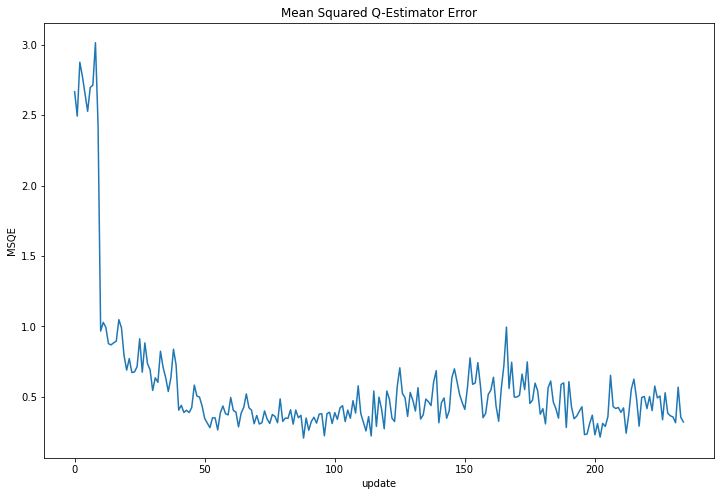

In [189]:
msqe = np.loadtxt("./logs/defect.log")

fig, ax = plt.subplots()

ax.plot(msqe)

ax.set_title("Mean Squared Q-Estimator Error")
ax.set_xlabel("update")
ax.set_ylabel("MSQE")

plt.show()

### Runtime

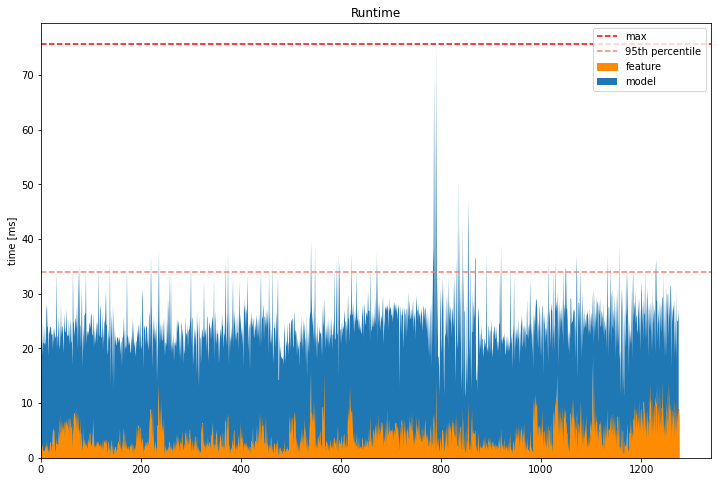

In [3]:
timings = np.loadtxt("./logs/timing.log", delimiter=',')

t_feature = timings[:,0] * 1000
t_complete = timings[:, 1] * 1000

N = len(t_feature)

fig, ax = plt.subplots()

max_time = np.max(t_complete)
percentile_95 = np.percentile(t_complete, 95)

ax.fill_between(range(N), t_feature, color='darkorange', label="feature")
ax.fill_between(range(N), t_feature , t_complete, label="model")

plt.axhline(y=max_time, color='red', linestyle='--', label='max')
plt.axhline(y=percentile_95, color='salmon', linestyle='--', label='95th percentile')

ax.set_title("Runtime")
ax.set_ylabel("time [ms]")
ax.legend(loc='upper right')
ax.set_xlim(0)
ax.set_ylim(0)

plt.show()

### Evaluate Score

In [7]:
import json
import os

STATSFILE = "stats.json"
def evaluate_performance(model, rounds):
    fig, ax = plt.subplots()
    if os.path.exists(STATSFILE):
        os.remove(STATSFILE)
    os.system(f"python3 ../../main.py play --my-agent agent1 --no-gui --n-rounds {rounds} --save-stats stats.json --model {model}")

    with open(STATSFILE, 'r') as f:
        stats = json.load(f)
        by_agent = stats["by_agent"]
        agent_score = [by_agent[agent]["score"] for agent in by_agent.keys()]

        ax.bar(by_agent.keys(), agent_score)
        ax.title.set_text(model)

    print(f"Total agent score: {agent_score}")
    print(f"Average score per round: {agent_score/rounds}")
    print(f"Percentage of points achieved: {100*np.round(agent_score[0]/sum(agent_score), 2)}%")

    plt.show()

#### Version 1

100%|██████████| 100/100 [07:33<00:00,  4.53s/it]


Percentage of points achieved: 20.0


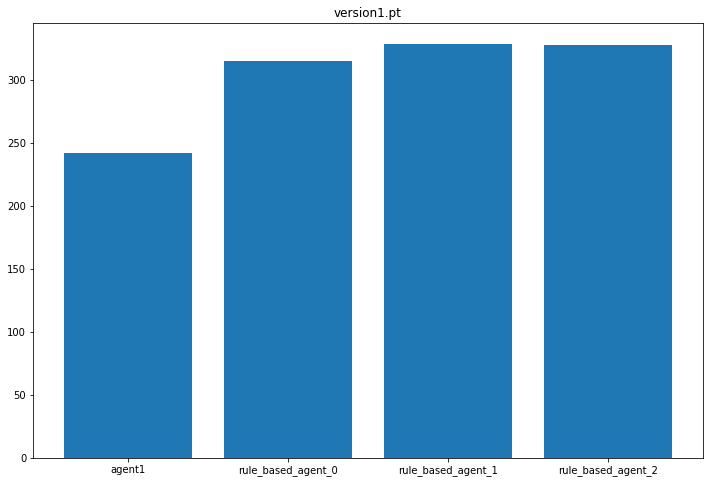

In [6]:
evaluate_performance(model="version1.pt", rounds=100)